Problem of prediction shift

two features which are independent bernoilly xv with p = 0.5

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Trying bias with same and differnt X

In [264]:
def get_prediction_decision_stomp(X_train, y_train, X_test):
    """
    X and y are 1-D arrays
    """
    ds = DecisionTreeClassifier(max_depth=1)
    ds.fit(X_train, y_train)
    pred_train = ds.predict(X_train)
    pred_test = ds.predict(X_test)
    resi_train = y_train - pred_train
    return resi_train, pred_train, pred_test

### Case when both features same for decision stomps

In [284]:
np.mean(y_train), np.mean(final_pred_train1), np.mean(y_test),  np.mean(final_pred_test1), 

(35.1, 35.3, 37.0, 37.0)

### Case when both features differnt for decision stomps

In [285]:
np.mean(y_train), np.mean(final_pred_train2), np.mean(y_test),  np.mean(final_pred_test2), 

(35.1, 37.65, 37.0, 38.65)

In [208]:
np.mean(y)

34.54

## Compiling all in one funciton to experiment with n 

In [355]:
def get_bias_two_decision_stomps(n, 
                                 c1=10,
                                 c2=2, 
                                 n_trials=10, 
                                 p=0.5,
                                 fraction_train=0.8):
    
    # every experiment 100 times
    bias_train1=[]
    bias_test1=[]
    bias_train2=[]
    bias_test2=[]
    
    for i in range(100):
    
        x1 = np.random.binomial(n_trials, p, n)
        x2 = np.random.binomial(n_trials, p, n)

        y = c1*x1 + c2*x2

        # train-test split
        fraction_train = 0.8
        X = pd.DataFrame(data={"x1": x1,"x2": x2})
        X_train = X.iloc[:int(fraction_train*n)]
        X_test = X.iloc[int(fraction_train*n):]

        y_train = y[:int(fraction_train*n)]
        y_test = y[int(fraction_train*n):]

        # 1st stomp
        resi_train1, pred_train1, pred_test1 = get_prediction_decision_stomp(pd.DataFrame(X_train.x1),
                                                                   y_train,
                                                                   pd.DataFrame(X_test.x1))

        # 2nd stomp with same feature
        resi_train21, pred_train21, pred_test21 = get_prediction_decision_stomp(pd.DataFrame(X_train.x1), 
                                                                                resi_train1,
                                                                                pd.DataFrame(X_test.x1))
        final_pred_train1 = pred_train21 + pred_train1
        final_pred_test1 = pred_test21 + pred_test1
        bias_train1.append(np.mean(y_train - final_pred_train1))
        bias_test1.append(np.mean(y_test - final_pred_test1))

        # 2nd stomp with different feature
        resi_train22, pred_train22, pred_test22 = get_prediction_decision_stomp(pd.DataFrame(X_train.x2), 
                                                                                resi_train1,
                                                                                pd.DataFrame(X_test.x2))  

        final_pred_train2 = pred_train22 + pred_train1
        final_pred_test2 = pred_test22 + pred_test1
        bias_train2.append(np.mean(y_train - final_pred_train2))
        bias_test2.append(np.mean(y_test - final_pred_test2))
        
    return np.mean(bias_train1), np.mean(bias_test1), np.mean(bias_train2), np.mean(bias_test2)

In [356]:
exper = [10,100,1000,5000,10000,50000,100000,500000,1000000]

In [357]:
bias_train1 = []
bias_test1 = []
bias_train2 = []
bias_test2 = []
for k in exper:
#     n = 2**(k)
    btr1, bts1, btr2, bts2 = get_bias_two_decision_stomps(n)
    bias_train1.append(btr1)
    bias_test1.append(bts1)
    bias_train2.append(btr2)
    bias_test2.append(bts2)

In [358]:
bias_test1

[0.33281553398058245,
 -0.05339805825242717,
 -0.0013592233009708653,
 0.36893203883495146,
 0.21165048543689316,
 0.06271844660194173,
 0.3048543689320389,
 0.10932038834951464,
 0.43786407766990293]

In [359]:
exper_str = [str(i) for i in exper]

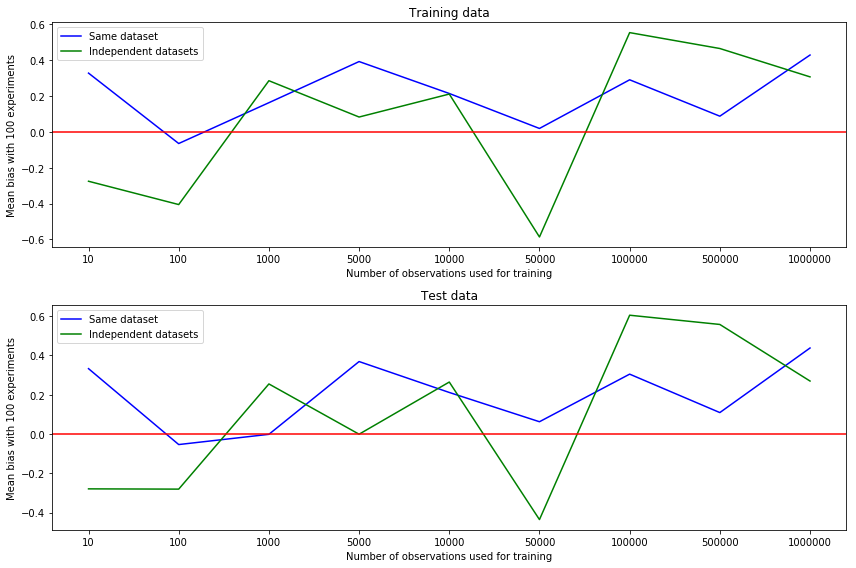

In [360]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (12,8)) # 1st width, 2nd height

case1, = ax1.plot(exper_str, bias_train1, color="b", label = "Same dataset")  # same
case2, = ax1.plot(exper_str, bias_train2, color="g", label = "Independent datasets")  # different
ax1.axhline(y=0, color="r")
ax1.legend(handles = [case1, case2])
ax1.set_xlabel("Number of observations used for training")
ax1.set_ylabel("Mean bias with 100 experiments")
ax1.set_title('Training data') 


test_case1, = ax2.plot(exper_str, bias_test1, color="b", label = "Same dataset")  # same
test_case2, = ax2.plot(exper_str, bias_test2, color="g", label = "Independent datasets")  # different
ax2.axhline(y=0, color="r")
ax2.legend(handles = [test_case1, test_case2])
ax2.set_xlabel("Number of observations used for training")
ax2.set_ylabel("Mean bias with 100 experiments")
ax2.set_title('Test data') 

fig.tight_layout()
